In [ ]:
# @title Installing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm



In [ ]:
# @title Reading DataSet

data = pd.read_csv('network_traffic_dataset.csv')


In [ ]:
# @title Finding Total Instances / Length of Dataset
len(data)

501713

In [ ]:
# @title Extracting Relevant Features

X = data[['Time', 'Length']]


In [ ]:
# @title Pre-Processing the Numerical Features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# @title Finding Mean & Standart Deviation

means = X_scaled.mean(axis=0)
stds = X_scaled.std(axis=0)


In [ ]:
# @title Calculating Anamoly Score of Each Data Point Using PDF

anomaly_scores = np.prod(norm.pdf(X_scaled, means, stds), axis=1)


In [ ]:
# @title Setting Threshhold Upto 99

threshold = np.percentile(anomaly_scores, 99)


In [ ]:
# @title Collecting Anomaly

anomalies = X[anomaly_scores > threshold]


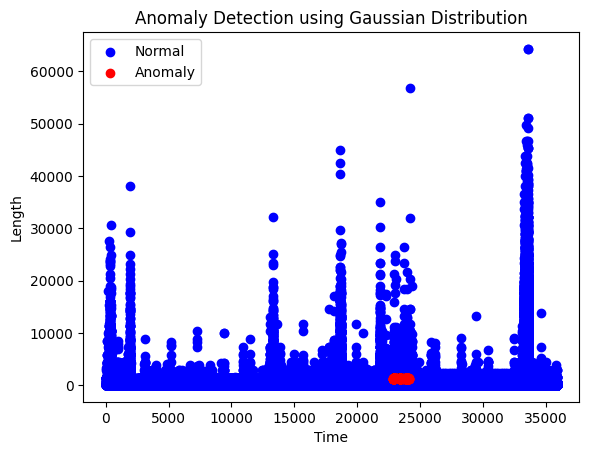

In [ ]:
# @title Showing Anamoly in Network Traffic

plt.scatter(X['Time'], X['Length'], color='blue', label='Normal')
plt.scatter(anomalies['Time'], anomalies['Length'], color='red', label='Anomaly')
plt.xlabel('Time')
plt.ylabel('Length')
plt.title('Anomaly Detection using Gaussian Distribution')
plt.legend()
plt.show()

In [ ]:
# @title Setting Threshhold upto 77

threshold = np.percentile(anomaly_scores, 77)


In [ ]:
# @title Collecting Anomaly

anomalies = X[anomaly_scores > threshold]


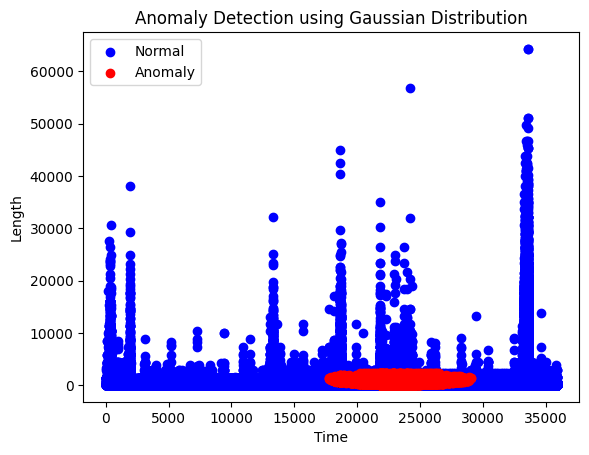

In [ ]:
# @title Showing Anamoly in Network Traffic

plt.scatter(X['Time'], X['Length'], color='blue', label='Normal')
plt.scatter(anomalies['Time'], anomalies['Length'], color='red', label='Anomaly')
plt.xlabel('Time')
plt.ylabel('Length')
plt.title('Anomaly Detection using Gaussian Distribution')
plt.legend()
plt.show()

In [ ]:
# @title Defining Confusion Matrix

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
ground_truth = np.zeros(len(data))
ground_truth[data.index.isin(anomalies.index)] = 1
cm = confusion_matrix(ground_truth, anomaly_scores > threshold)

In [ ]:
# @title Calculating Precision, Recall, & F1-Score

precision = precision_score(ground_truth, anomaly_scores > threshold)
recall = recall_score(ground_truth, anomaly_scores > threshold)
f1 = f1_score(ground_truth, anomaly_scores > threshold)

In [ ]:
# @title ROC & AUC Calculation

fpr, tpr, thresholds = roc_curve(ground_truth, anomaly_scores)
roc_auc = roc_auc_score(ground_truth, anomaly_scores)

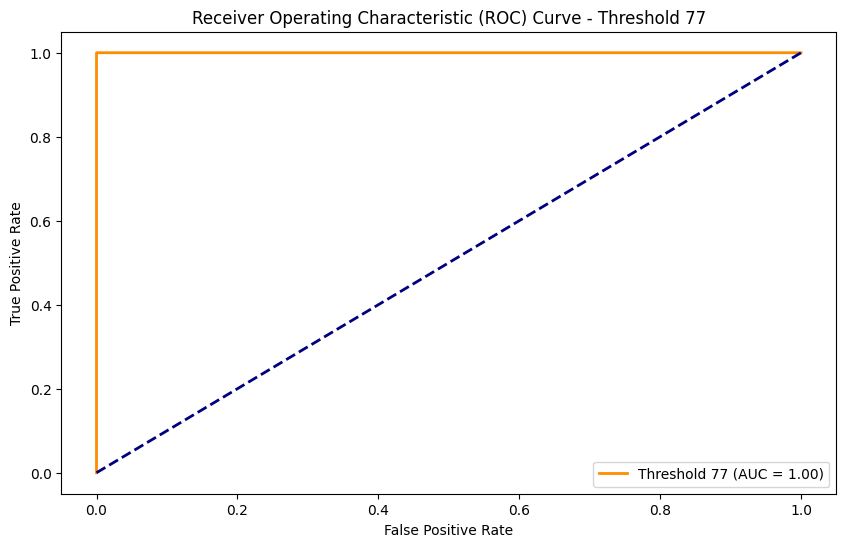

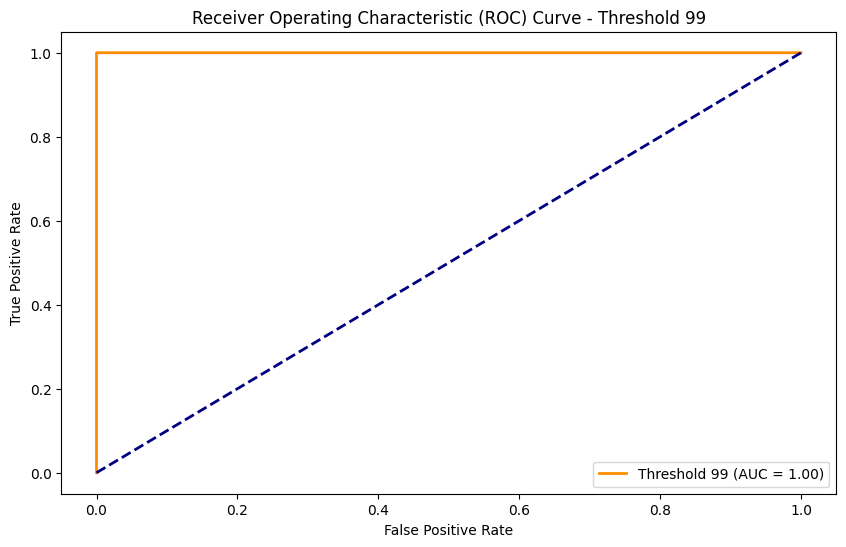

In [ ]:
# @title Calculating ROC Curve at 77 & 99 Threshold
def plot_roc_curve(ground_truth, anomaly_scores, thresholds, title):
    fpr, tpr, _ = roc_curve(ground_truth, anomaly_scores)
    roc_auc = roc_auc_score(ground_truth, anomaly_scores)

    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{title} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {title}')
    plt.legend()
    plt.show()

ground_truth = np.zeros(len(data))
ground_truth[data.index.isin(anomalies.index)] = 1
anomaly_scores = np.prod(norm.pdf(X_scaled, means, stds), axis=1)
threshold_77 = 77
fpr_77, tpr_77, thresholds_77 = roc_curve(ground_truth, anomaly_scores)
roc_auc_77 = roc_auc_score(ground_truth, anomaly_scores)
threshold_99 = 99
fpr_99, tpr_99, thresholds_99 = roc_curve(ground_truth, anomaly_scores)
roc_auc_99 = roc_auc_score(ground_truth, anomaly_scores)

plot_roc_curve(ground_truth, anomaly_scores, thresholds_77, title='Threshold 77')
plot_roc_curve(ground_truth, anomaly_scores, thresholds_99, title='Threshold 99')


In [ ]:
# @title Look at Confusion Matrix

print("Confusion Matrix:")
print(cm)
print("\nPrecision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
print("AUC: {:.2f}".format(roc_auc))

Confusion Matrix:
[[386319      0]
 [     0 115394]]

Precision: 1.00
Recall: 1.00
F1 Score: 1.00
AUC: 1.00


In [ ]:
# @title Validating Total Instances

total_no_of_Instancxes = (386319 + 115394)
print("total_no of instancxes equla to length of dataset which we are using: ", total_no_of_Instancxes)

total_no of instancxes equla to length of dataset which we are using:  501713
